# Fundo de Investimento - Nikos Ouro

Este notebook tem por objetivo analisar investimentos no fundo Nikos Ouro, dispónivel para investimentos no Nubank.
A maioria dos dados deste notebook, com exceção das cotações do Fundo de Investimento (FI) Nikos Ouro, estão vindo da biblioteca yfinance que pega as cotações direto do Yahoo Finance. Para recuperar os dados do FI Nikos Ouro, é recomendado baixar manualmente, um horizonte de 5 anos, o csv disponível no sítio do Investing.com pelo link: https://br.investing.com/funds/orama-ouro-fundo-de-investimento-mu-historical-data


In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from statsmodels.tsa.filters.hp_filter import hpfilter
from numpy.fft import fft, ifft, fftfreq

## 1) Importando os Dados

In [2]:
gold_yf = yf.Ticker('GC=F')
gold = gold_yf.history(period='5y')

dollar_yf = yf.Ticker('USDBRL=X')
dollar = dollar_yf.history(period='5y')

ibov_yf = yf.Ticker('^BVSP')
ibov = ibov_yf.history(period='5y')

oil_yf = yf.Ticker('BZ=F')
oil = oil_yf.history(period='5y')

nikos_ouro = pd.read_csv('0P0000U6R2 - Dados Históricos.csv')

In [3]:
gold.reset_index(inplace=True)
gold.head(10)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-06-19 00:00:00-04:00,1723.699951,1750.699951,1723.500000,1745.900024,1329,0.0,0.0
1,2020-06-22 00:00:00-04:00,1755.199951,1767.599976,1750.500000,1756.699951,1356,0.0,0.0
2,2020-06-23 00:00:00-04:00,1755.400024,1776.300049,1754.199951,1772.099976,666,0.0,0.0
3,2020-06-24 00:00:00-04:00,1778.300049,1783.099976,1764.500000,1765.800049,961,0.0,0.0
4,2020-06-25 00:00:00-04:00,1761.699951,1764.800049,1759.800049,1762.099976,207,0.0,0.0
5,2020-06-26 00:00:00-04:00,1766.000000,1772.500000,1764.699951,1772.500000,640,0.0,0.0
6,2020-06-29 00:00:00-04:00,1779.800049,1780.199951,1774.300049,1774.800049,584,0.0,0.0
7,2020-06-30 00:00:00-04:00,1777.300049,1793.199951,1774.400024,1793.000000,986,0.0,0.0
8,2020-07-01 00:00:00-04:00,1793.599976,1798.000000,1765.800049,1773.199951,331,0.0,0.0
9,2020-07-02 00:00:00-04:00,1773.400024,1784.000000,1768.699951,1784.000000,215,0.0,0.0


In [4]:
dollar.reset_index(inplace=True)
dollar.head(10)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-06-19 00:00:00+01:00,5.37640,5.380700,5.323400,5.3772,0,0.0,0.0
1,2020-06-22 00:00:00+01:00,5.14050,5.313200,5.140500,5.3100,0,0.0,0.0
2,2020-06-23 00:00:00+01:00,5.25190,5.254400,5.145800,5.2519,0,0.0,0.0
3,2020-06-24 00:00:00+01:00,5.15100,5.317800,5.148539,5.1510,0,0.0,0.0
4,2020-06-25 00:00:00+01:00,5.34770,5.369700,5.265800,5.3466,0,0.0,0.0
5,2020-06-26 00:00:00+01:00,5.35970,5.489800,5.356802,5.3595,0,0.0,0.0
6,2020-06-29 00:00:00+01:00,5.48473,5.485200,5.391565,5.4809,0,0.0,0.0
7,2020-06-30 00:00:00+01:00,5.40240,5.504800,5.396723,5.4021,0,0.0,0.0
8,2020-07-01 00:00:00+01:00,5.46140,5.465569,5.340000,5.4617,0,0.0,0.0
9,2020-07-02 00:00:00+01:00,5.31660,5.340700,5.267600,5.3162,0,0.0,0.0


In [5]:
ibov.reset_index(inplace=True)
ibov.head(10)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-06-18 00:00:00-03:00,95547.0,97110.0,94698.0,96125.0,10008500,0.0,0.0
1,2020-06-19 00:00:00-03:00,96138.0,97540.0,95874.0,96572.0,13134400,0.0,0.0
2,2020-06-22 00:00:00-03:00,96572.0,96870.0,94869.0,95336.0,8264700,0.0,0.0
3,2020-06-23 00:00:00-03:00,95344.0,97486.0,95344.0,95975.0,9752700,0.0,0.0
4,2020-06-24 00:00:00-03:00,95974.0,95974.0,93259.0,94377.0,9962700,0.0,0.0
5,2020-06-25 00:00:00-03:00,94382.0,96260.0,94152.0,95983.0,8697900,0.0,0.0
6,2020-06-26 00:00:00-03:00,95979.0,95979.0,93514.0,93834.0,8439100,0.0,0.0
7,2020-06-29 00:00:00-03:00,93837.0,95735.0,93825.0,95735.0,8906800,0.0,0.0
8,2020-06-30 00:00:00-03:00,95728.0,96257.0,94806.0,95056.0,10144500,0.0,0.0
9,2020-07-01 00:00:00-03:00,95062.0,96852.0,95062.0,96203.0,10163300,0.0,0.0


In [6]:
oil.reset_index(inplace=True)
oil.head(10)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-06-19 00:00:00-04:00,41.419998,42.930000,41.009998,42.189999,34079,0.0,0.0
1,2020-06-22 00:00:00-04:00,41.549999,43.169998,41.509998,43.080002,24433,0.0,0.0
2,2020-06-23 00:00:00-04:00,43.169998,43.930000,42.209999,42.630001,27036,0.0,0.0
3,2020-06-24 00:00:00-04:00,42.330002,42.889999,39.619999,40.310001,28537,0.0,0.0
4,2020-06-25 00:00:00-04:00,40.430000,41.639999,39.470001,41.049999,32530,0.0,0.0
5,2020-06-26 00:00:00-04:00,41.470001,41.779999,40.290001,41.020000,13481,0.0,0.0
6,2020-06-29 00:00:00-04:00,40.310001,41.939999,40.060001,41.709999,9783,0.0,0.0
7,2020-06-30 00:00:00-04:00,41.549999,41.619999,40.939999,41.150002,29381,0.0,0.0
8,2020-07-01 00:00:00-04:00,41.720001,42.619999,41.029999,42.029999,26731,0.0,0.0
9,2020-07-02 00:00:00-04:00,42.020000,43.220001,41.750000,43.139999,21825,0.0,0.0


In [7]:
nikos_ouro.reset_index(inplace=True)
nikos_ouro.head(10)

,index,Data,Último,Abertura,Máxima,Mínima,Var%
0,0,17.06.2025,"5,302","5,302","5,302","5,302","-0,94%"
1,1,16.06.2025,"5,352","5,352","5,352","5,352","-1,97%"
2,2,13.06.2025,"5,459","5,459","5,459","5,354","1,97%"
3,3,12.06.2025,"5,354","5,354","5,354","5,354","1,76%"
4,4,11.06.2025,"5,261","5,261","5,277","5,261","-0,29%"
5,5,10.06.2025,"5,277","5,277","5,277","5,277","-0,70%"
6,6,09.06.2025,"5,314","5,314","5,314","5,314","-0,08%"
7,7,06.06.2025,"5,318","5,318","5,365","5,318","-0,88%"
8,8,05.06.2025,"5,365","5,365","5,365","5,365","-1,34%"
9,9,04.06.2025,"5,438","5,438","5,438","5,438","0,02%"


## 2) Tratando os Dados

### 2.1) Preparando os Dados

In [8]:
nikos_ouro['Data'] = pd.to_datetime(nikos_ouro['Data'], format='%d.%m.%Y').dt.tz_localize(None)
nikos_ouro.rename({'Último' : 'Close_nikos'}, inplace=True, axis='columns')
nikos_ouro['Close_nikos'] = nikos_ouro['Close_nikos'].str.replace(',', '.', regex=False)
nikos_ouro['Close_nikos'] = pd.to_numeric(nikos_ouro['Close_nikos'], errors='coerce')

gold['Date'] = pd.to_datetime(gold['Date']).dt.tz_localize(None)
gold.rename({'Close' : 'Close_gold'}, inplace=True, axis='columns')

dollar['Date'] = pd.to_datetime(dollar['Date']).dt.tz_localize(None)
dollar.rename({'Close' : 'Close_dollar'}, inplace=True, axis='columns')

ibov['Date'] = pd.to_datetime(ibov['Date']).dt.tz_localize(None)
ibov.rename({'Close' : 'Close_ibov'}, inplace=True, axis='columns')

oil['Date'] = pd.to_datetime(oil['Date']).dt.tz_localize(None)
oil.rename({'Close' : 'Close_oil'}, inplace=True, axis='columns')

### 2.2) Cruzando os DataFrames

In [9]:
df = pd.merge(nikos_ouro, gold, how='left', left_on=['Data'],right_on=['Date'], suffixes=('_nikos','_gold'))
df = pd.merge(df, dollar, how='left', left_on=['Data'],right_on=['Date'], suffixes=('','_dollar'))
df = pd.merge(df, ibov, how='left', left_on=['Data'],right_on=['Date'], suffixes=('','_ibov'))
df = pd.merge(df, oil, how='left', left_on=['Data'],right_on=['Date'], suffixes=('','_oil'))
df = df[['Data','Close_nikos','Close_dollar','Close_gold','Close_ibov','Close_oil']]
df.describe()

,Close_nikos,Close_dollar,Close_gold,Close_ibov,Close_oil
count,1344.000000,1233.000000,1200.000000,1224.000000,1201.000000
mean,3.485484,5.298243,2072.998747,116915.468954,77.681782
std,0.646933,0.320209,405.652856,10782.057488,16.873548
min,2.302000,4.593800,1623.300049,93580.000000,37.459999
25%,3.082000,5.053100,1808.950012,108732.250000,70.949997
50%,3.289500,5.258400,1918.000000,117143.000000,78.370003
75%,3.643250,5.538900,2176.350098,126267.000000,85.820000
max,5.634000,6.300000,3431.199951,140110.000000,127.980003


## 3) Normalizando os Dados

In [10]:
num_cols = df.select_dtypes(include=['float64']).columns
# criar scaler
scaler = MinMaxScaler()

# normalizar só colunas numéricas
df[num_cols] = scaler.fit_transform(df[num_cols])
df.head()

,Data,Close_nikos,Close_dollar,Close_gold,Close_ibov,Close_oil
0,2025-06-17,0.900360,0.525730,0.975331,0.972706,0.430733
1,2025-06-16,0.915366,0.553921,0.980751,0.981646,0.395161
2,2025-06-13,0.947479,0.552983,1.000000,0.937739,0.406209
3,2025-06-12,0.915966,0.552104,0.972178,0.950355,0.352408
4,2025-06-11,0.888055,0.573379,0.939211,0.935912,0.356938


## 4) Visualizando Padrões

### 4.1) Correlação

<Axes: >

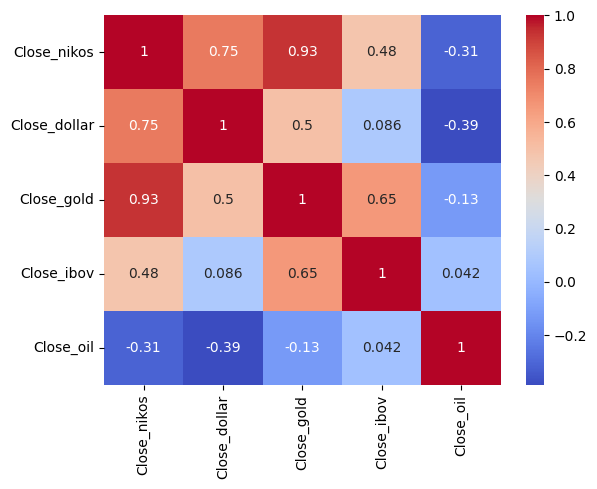

In [11]:
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', vmax = 1, annot=True)

Obs: Existe uma correlação mais forte entre movimentos do preço de fechamento do ouro com os movimentos do preço por cota do Fundo Nikos Ouro do que do preço da cota do fundo e o dólar.

### 4.2) Decomposição da Série (Tendência e Sazonalidade)

#### 4.2.1) Dados Reais

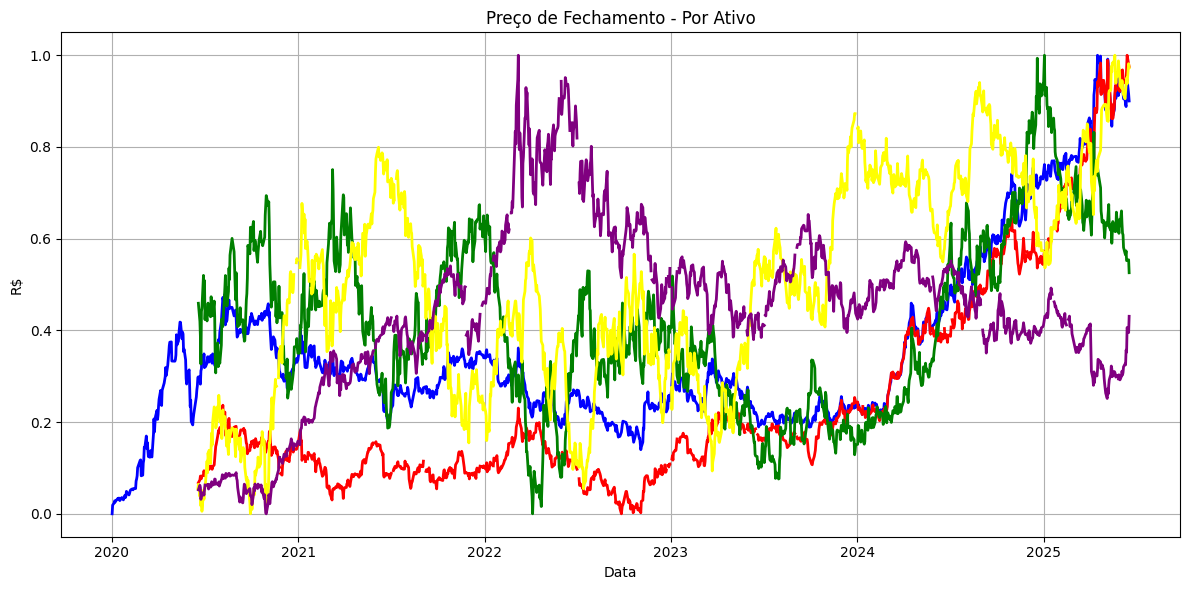

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(df['Data'], df['Close_nikos'], color='blue', label='Nikos Ouro', linewidth=2)
plt.plot(df['Data'], df['Close_gold'], color='red', label='Ouro', linewidth=2)
plt.plot(df['Data'], df['Close_dollar'], color='green', label='Dólar', linewidth=2)
plt.plot(df['Data'], df['Close_ibov'], color='yellow', label='Ibov', linewidth=2)
plt.plot(df['Data'], df['Close_oil'], color='purple', label='Petróleo', linewidth=2)
plt.title('Preço de Fechamento - Por Ativo')
plt.xlabel('Data')
plt.ylabel('R$')
plt.grid(True)
plt.tight_layout()
plt.show()

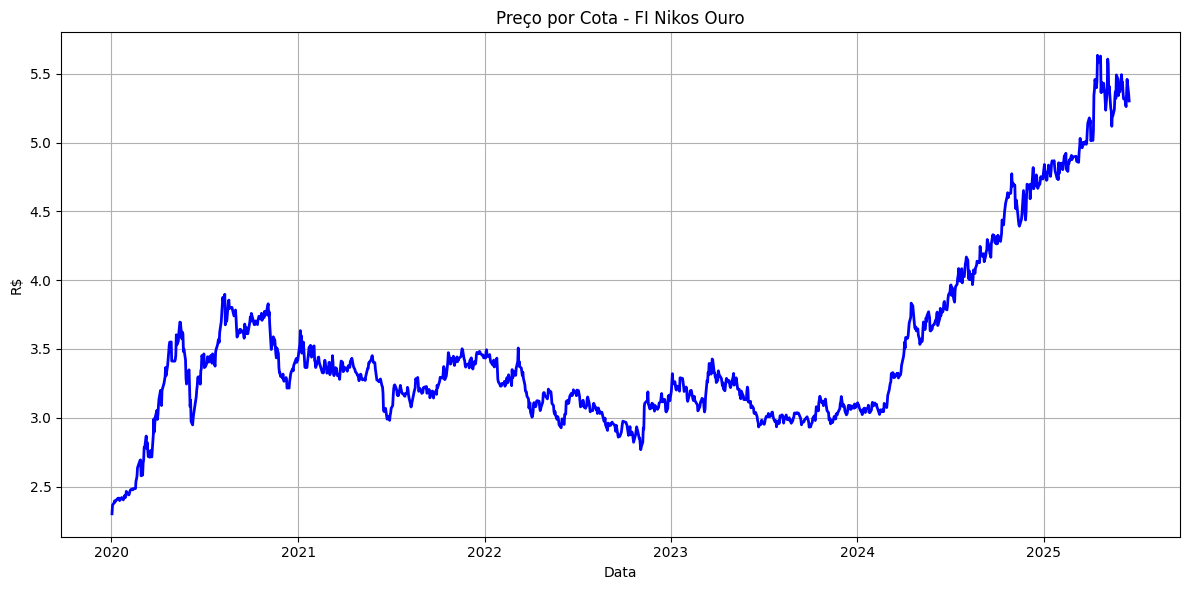

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(nikos_ouro['Data'], nikos_ouro['Close_nikos'], color='blue', linewidth=2)
plt.title('Preço por Cota - FI Nikos Ouro')
plt.xlabel('Data')
plt.ylabel('R$')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 4.2.2) Decomposição (Tendência e Sazonalidade) com Hodrick-Prescott

In [14]:
ciclo, tendencia = hpfilter(df['Close_nikos'], lamb=12960)  # use 129600 para dados diários (para demais períodos verificar qual lambda é indicado).
df['detrended'] = ciclo
df['trend'] = tendencia
df.describe()

,Close_nikos,Close_dollar,Close_gold,Close_ibov,Close_oil,detrended,trend
count,1344.000000,1233.000000,1200.000000,1224.000000,1201.000000,1.344000e+03,1344.000000
mean,0.355187,0.412872,0.248741,0.501514,0.444341,-5.815807e-14,0.355187
std,0.194157,0.187674,0.224378,0.231723,0.186407,2.204880e-02,0.192278
min,0.000000,0.000000,0.000000,0.000000,0.000000,-1.117157e-01,0.010690
25%,0.234094,0.269195,0.102688,0.325645,0.369973,-1.227423e-02,0.234870
50%,0.296369,0.389520,0.163007,0.506404,0.451944,-5.500058e-05,0.298272
75%,0.402536,0.553921,0.305907,0.702493,0.534247,1.099665e-02,0.401462
max,1.000000,1.000000,1.000000,1.000000,1.000000,9.994168e-02,0.921955


#### 4.2.3) Tendência

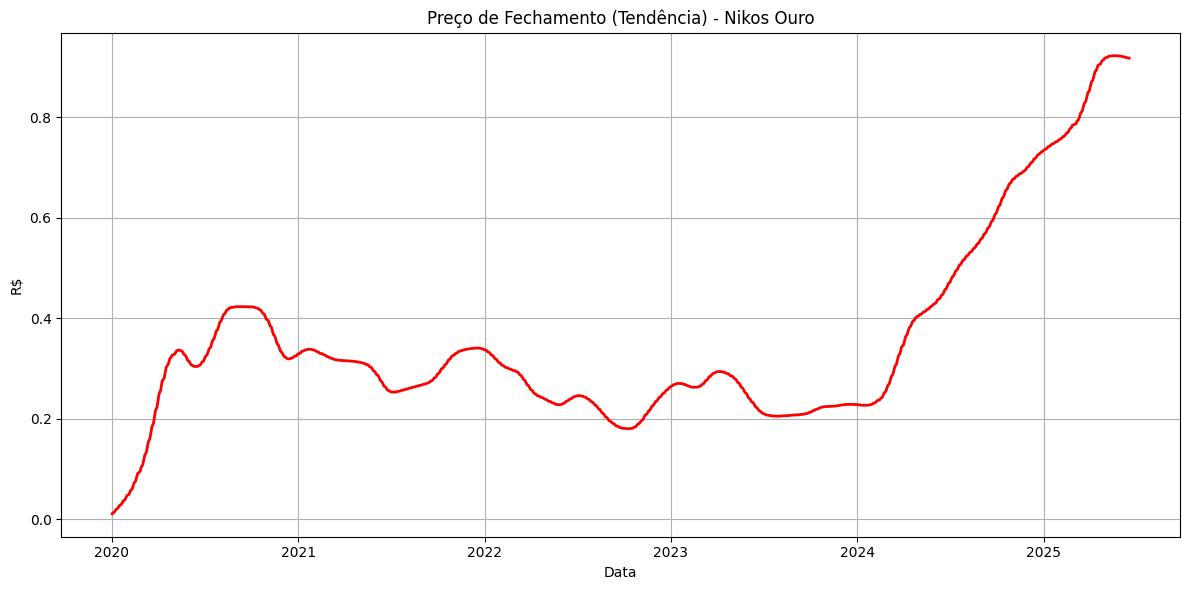

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(df['Data'], df['trend'], color='red', linewidth=2)
plt.title('Preço de Fechamento (Tendência) - Nikos Ouro')
plt.xlabel('Data')
plt.ylabel('R$')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 4.2.4) Sazonalidade

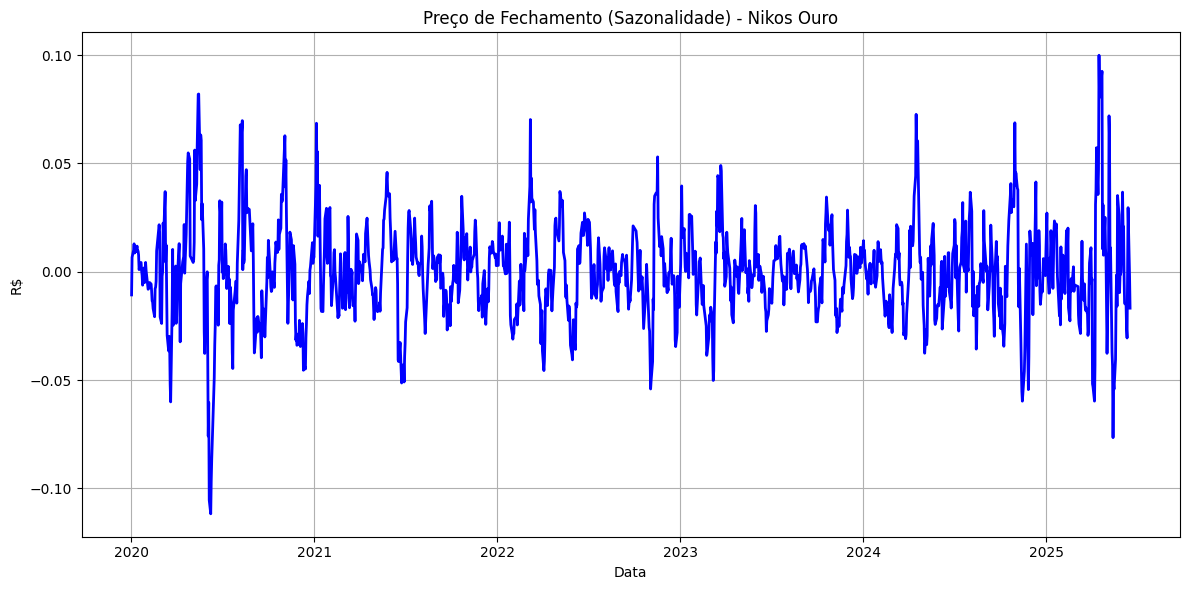

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(df['Data'], df['detrended'], color='blue', linewidth=2)
plt.title('Preço de Fechamento (Sazonalidade) - Nikos Ouro')
plt.xlabel('Data')
plt.ylabel('R$')
plt.grid(True)
plt.tight_layout()
plt.show()

### 4.3) Tranformada de Fourier (Sazonalidade)

In [17]:
detrended = df["detrended"].values
n = len(detrended)
t = np.arange(n)

fft_vals = fft(detrended)
frequencies = fftfreq(n, d=1)  # d=1 para dados diários

# Ignorar a componente de frequência zero (tendência)
amplitudes = np.abs(fft_vals)
amplitudes[0] = 0

In [18]:
# Frequências e amplitudes (só parte positiva, descartando zero)
positive_freqs = frequencies[:n//2]
positive_amplitudes = amplitudes[:n//2]
positive_amplitudes[0] = 0

In [19]:
# Obter os 5 maiores picos
top_indices_viewer = positive_amplitudes.argsort()[-5:]
top_indices_viewer = top_indices_viewer[::-1]  # ordenar do maior para o menor

# Mostrar os períodos
for idx in top_indices_viewer:
    freq = positive_freqs[idx]
    periodo = 1 / freq
    print(f"Frequência: {freq:.4f} ciclos/dia → Período: {periodo:.2f} dias")

Frequência: 0.0268 ciclos/dia → Período: 37.33 dias
Frequência: 0.0164 ciclos/dia → Período: 61.09 dias
Frequência: 0.0246 ciclos/dia → Período: 40.73 dias
Frequência: 0.0320 ciclos/dia → Período: 31.26 dias
Frequência: 0.0305 ciclos/dia → Período: 32.78 dias


In [20]:
# Obter os 2 maiores picos
top_indices = positive_amplitudes.argsort()[-2:]
top_indices = top_indices[::-1]  # ordenar do maior para o menor

# Mostrar os períodos
for idx in top_indices:
    freq = positive_freqs[idx]
    periodo = 1 / freq
    print(f"Frequência: {freq:.4f} ciclos/dia → Período: {periodo:.2f} dias")

Frequência: 0.0268 ciclos/dia → Período: 37.33 dias
Frequência: 0.0164 ciclos/dia → Período: 61.09 dias


#### 4.3.1) Plotando os dados

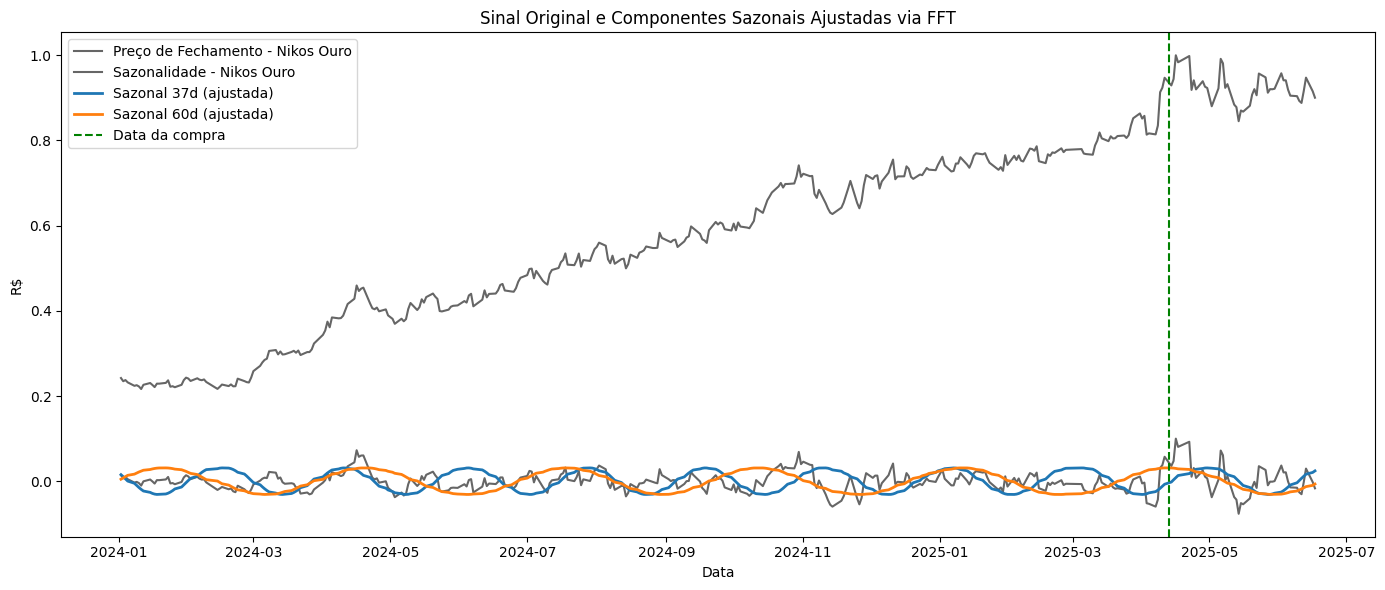

In [24]:
# Ajusta escala e média das componentes para a do sinal original
mean_original = np.mean(detrended)
std_original = np.std(detrended)

comp_adjusted = []
for comp in componentes:
    comp_centered = comp - np.mean(comp)
    comp_scaled = comp_centered / np.std(comp_centered) * std_original
    comp_final = comp_scaled + mean_original
    comp_adjusted.append(comp_final)


# Data da compra
data_especifica = pd.to_datetime('2025-04-13')
# Filtro no Plot
mascara = df['Data'] > pd.to_datetime('2024-01-01')

# Plotando tudo junto
plt.figure(figsize=(14,6))
plt.plot(df['Data'][mascara], df['Close_nikos'][mascara], label="Preço de Fechamento - Nikos Ouro", color='black', alpha=0.6)
plt.plot(df['Data'][mascara], detrended[mascara], label="Sazonalidade - Nikos Ouro", color='black', alpha=0.6)
plt.plot(df['Data'][mascara], comp_adjusted[0][mascara], label="Sazonal 37d (ajustada)", linewidth=2)
plt.plot(df['Data'][mascara], comp_adjusted[1][mascara], label="Sazonal 60d (ajustada)", linewidth=2)
plt.axvline(data_especifica, color='green', linestyle='--', label='Data da compra')
plt.title("Sinal Original e Componentes Sazonais Ajustadas via FFT")
plt.xlabel("Data")
plt.ylabel("R$")
plt.legend()
plt.tight_layout()
plt.show()

## 5) Conclusão

O ativo FI - Nikos Ouro possui dois ciclos de sazonalidade mais fortes, em primeiro lugar um ciclo de ~37 dias e outro ciclo mais brando de 60 dias. Possui forte correlação com o ouro, como esperado, dado a característica de investimento do fundo e também forte correlação com o dólar (>75%), também esperado, apesar de em alguns momentos os dois se distanciarem, visto o descolamento recente a partir de 2025. A linha tracejada em verde e vertical no último gráfico representa a data em que eu adquiri cotas no fundo (13/04/2025). É perceptível, pela análise, que adquiri cotas bem no pico das duas sazonalidades (ponto negativo). Entretanto, a série apresenta tendência de alta no último ano. Pensando que no cenário internacional a conjuntura é de instabilidade e o ouro é um ativo de fuga em momentos instáveis, eu manteria o ativo na carteira, pelo menos por mais seis meses.